### FindMarkers on Artery-C and Artery-K

Supplemental Figure 8 subfigures are generated

Author: Pierre Isnard, Dian Li, Haojia Wu

Contact: dianli@wustl.edu

Last updated: January 26, 2024

In [2]:
suppressMessages(library(Seurat))
suppressMessages(library(ggplot2))
suppressMessages(library(reshape2))
suppressMessages(library(EnhancedVolcano))
suppressMessages(library(dplyr))

suppressMessages(library(ComplexHeatmap))
suppressMessages(library(dichromat))
suppressMessages(library(RColorBrewer))

suppressMessages(library(scales))

In [3]:
plots_path_main = "../../plots/version_1/main_figures"
plots_path_supp = "../../plots/version_1/supp_figures"
processed_data_path = "../../processed_data/version_1/FindMarkers"

dir.create(plots_path_main, showWarnings = F, recursive = T)
dir.create(plots_path_supp, showWarnings = F, recursive = T)
dir.create(processed_data_path, showWarnings = F, recursive = T)

### Step 1. Load dkd1 Seurat object generated from Figure 1

In [4]:
load("../../processed_data/version_1/dkd1_umap.RData")

In [5]:
load("../../meta/meta_info.RData")

### Step 2. Subset object to Artery-C and Artery-K only

In [5]:
dkd1_artery <- subset(dkd1, subset = Morph.based == "Artery-C" | Morph.based == "Artery-K")
dkd1_artery

An object of class Seurat 
36131 features across 127 samples within 2 assays 
Active assay: SCT (18046 features, 3000 variable features)
 1 other assay present: Spatial
 2 dimensional reductions calculated: pca, umap
 1 image present: slice1

### Step 3. Generate UMAP

In [6]:
dkd1_artery <- SCTransform(dkd1_artery, assay = "Spatial", verbose = FALSE)
dkd1_artery <- RunPCA(dkd1_artery, assay = "SCT", verbose = FALSE)
dkd1_artery <- FindNeighbors(dkd1_artery, reduction = "pca", dims = 1:20)
dkd1_artery <- FindClusters(dkd1_artery, verbose = FALSE, resolution = 1)
dkd1_artery <- RunUMAP(dkd1_artery, reduction = "pca", dims = 1:20, min.dist = 0.1)

Computing nearest neighbor graph

Computing SNN

Warning message:
“The default method for RunUMAP has changed from calling Python UMAP via reticulate to the R-native UWOT using the cosine metric
To use Python UMAP via reticulate, set umap.method to 'umap-learn' and metric to 'correlation'
This message will be shown once per session”
10:10:14 UMAP embedding parameters a = 1.577 b = 0.8951

10:10:14 Read 127 rows and found 20 numeric columns

10:10:14 Using Annoy for neighbor search, n_neighbors = 30

10:10:14 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
|

10:10:14 Writing NN index file to temp file /tmp/RtmppOIdCU/file36f96e66febdaf

10:10:14 Searching Annoy index using 1 thread, search_k = 3000

10:10:14 Annoy recall = 100%

10:10:15 Commencing smooth kNN distance cal

In [7]:
custom_theme <- theme(text = element_text(family = "Helvetica"))

empty_theme = theme(axis.line=element_blank(),
      axis.text.x=element_blank(),
      axis.text.y=element_blank(),
      axis.ticks=element_blank(),
      axis.title.x=element_blank(),
      axis.title.y=element_blank())

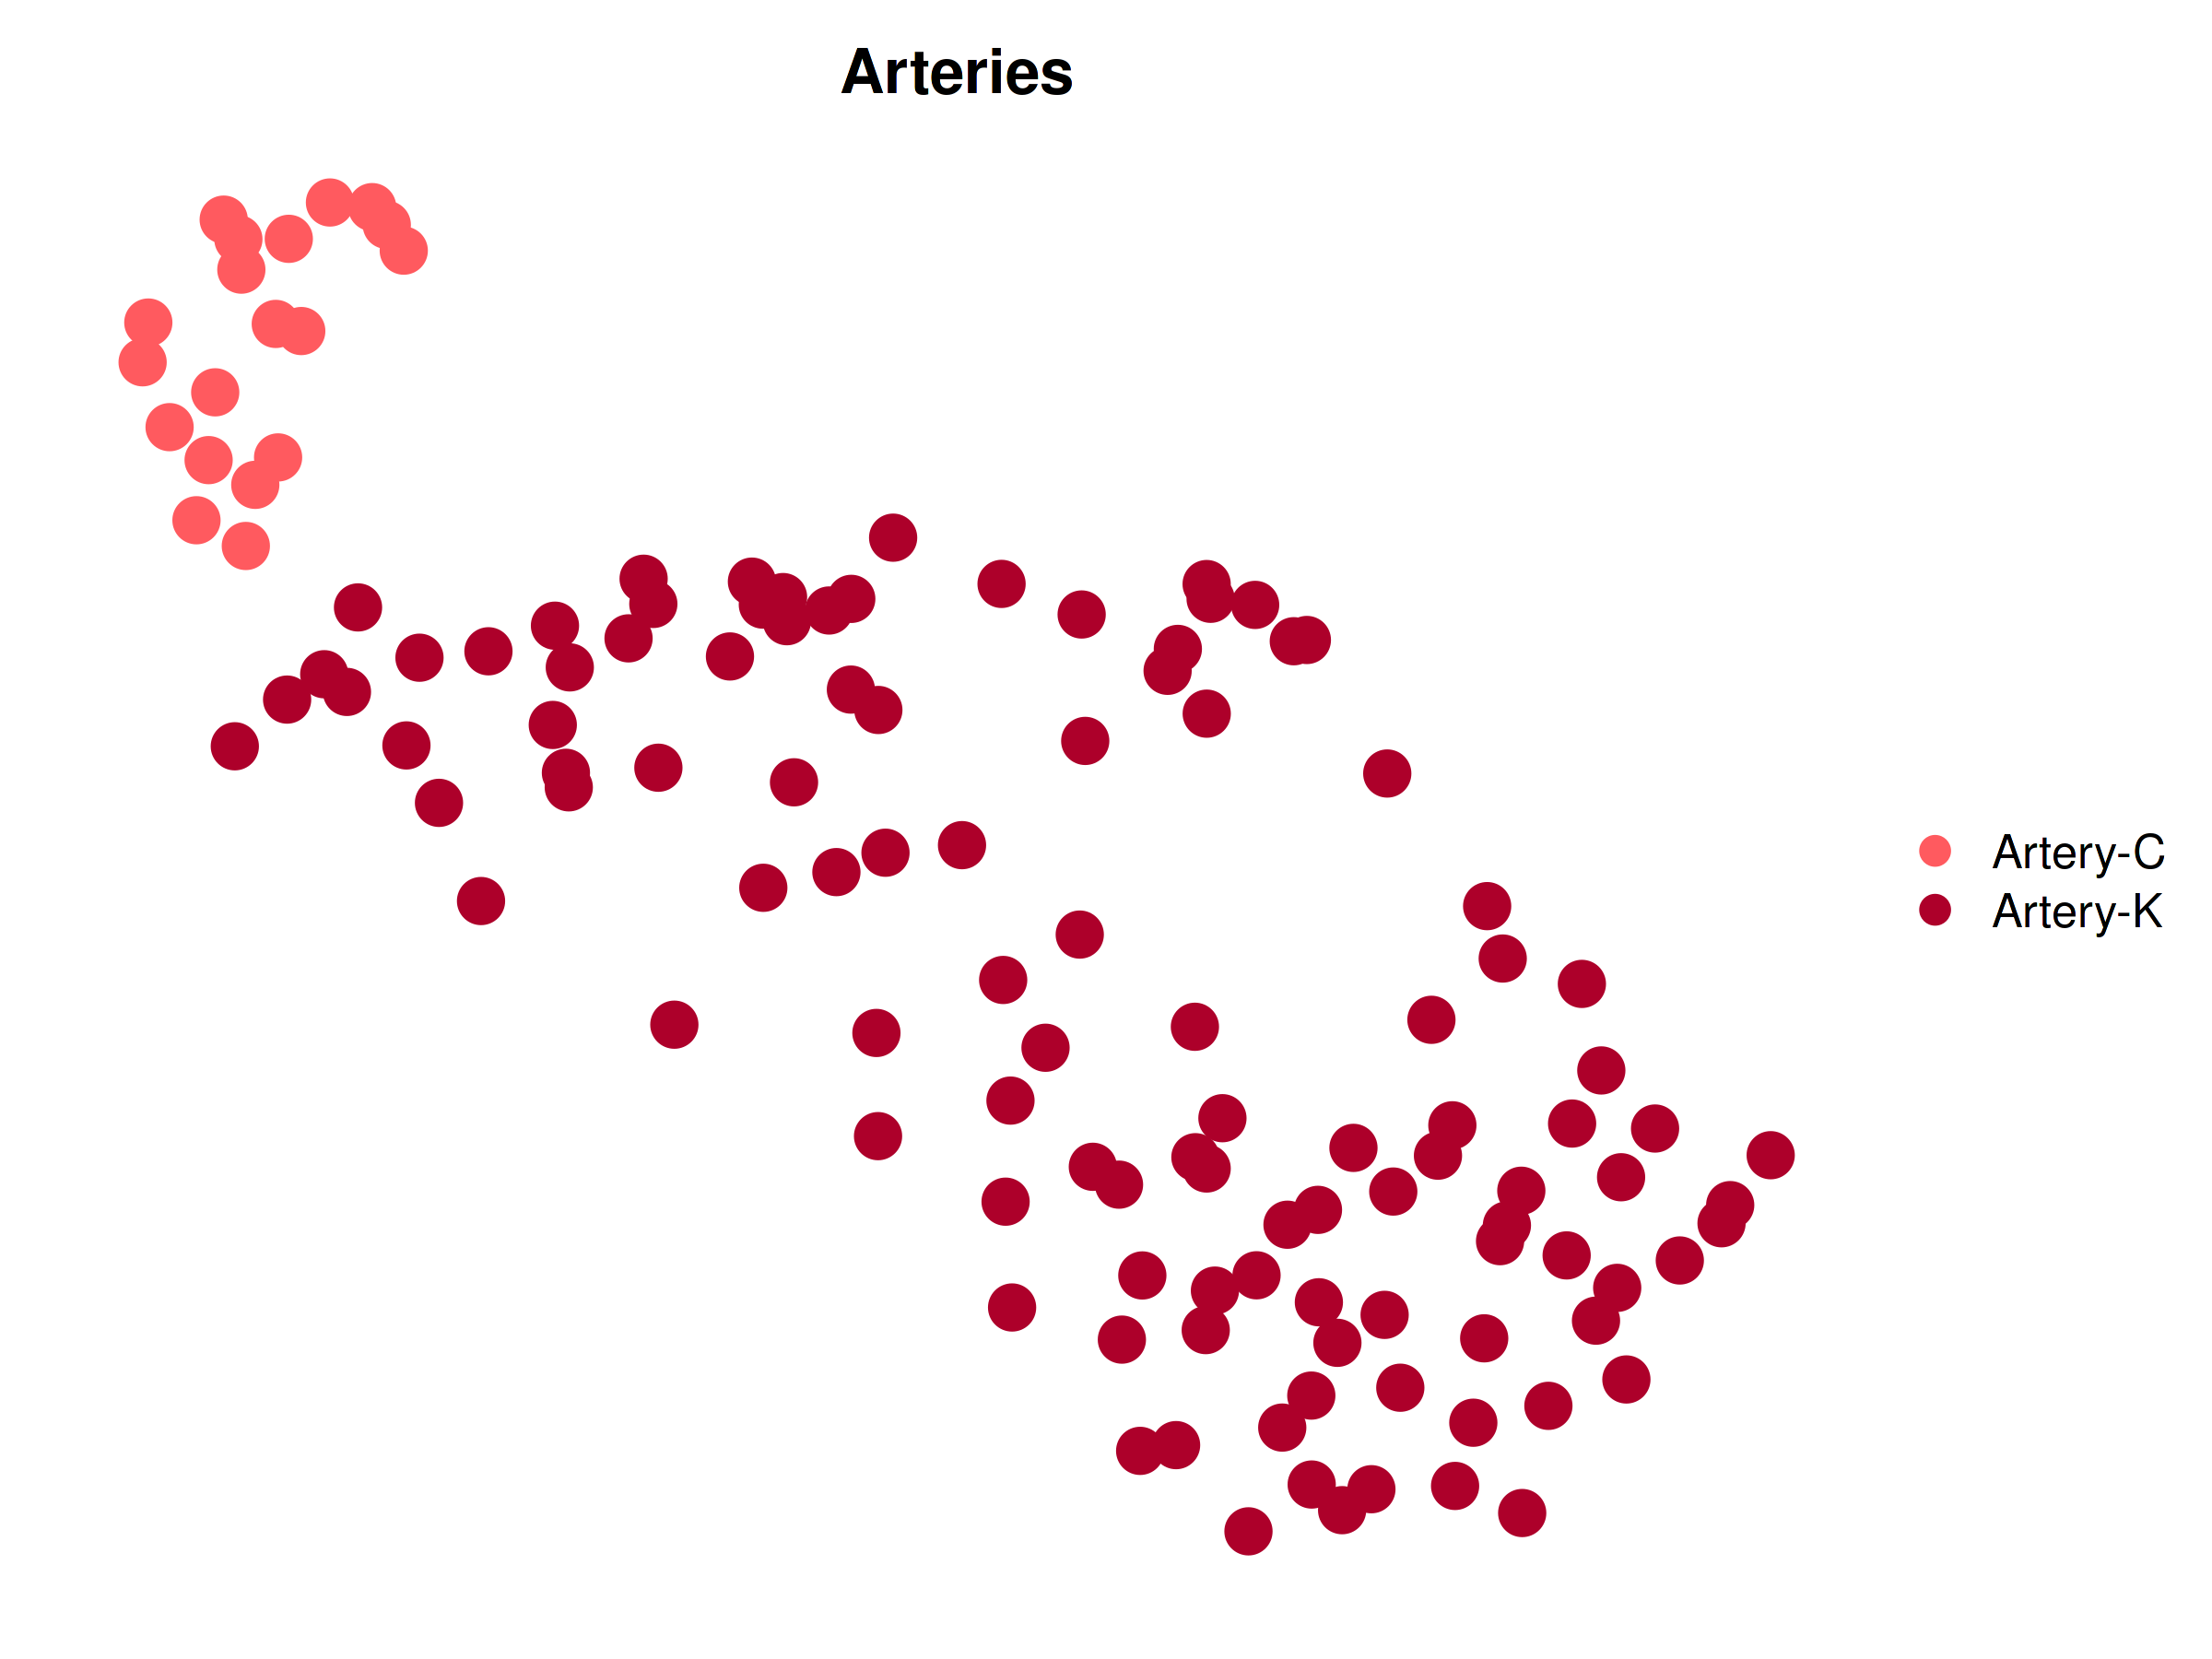

In [8]:
options(repr.plot.width = 8, repr.plot.height = 6, repr.plot.res = 300)
p = DimPlot(dkd1_artery, group.by = "Morph.based", raster = FALSE, pt.size = 5, 
            cols = c(color_palette[c("Artery-C", "Artery-K")])
           ) + ggtitle(label = "Arteries")
p = p + empty_theme + custom_theme
p

ggsave(file.path(plots_path_supp, "Dimplot_arter_morph_class.png"), plot = p, width = 8, height = 6, units = "in", dpi = 300)
ggsave(file.path(plots_path_supp, "Dimplot_arter_morph_class.pdf"), plot = p, width = 8, height = 6, units = "in", dpi = 300)
ggsave(file.path(plots_path_supp, "Dimplot_arter_morph_class.svg"), plot = p, width = 8, height = 6, units = "in", dpi = 300)

### Step 4. DEG analysis for Artery-C vs. Artery-K

In [9]:
suppressMessages(library("clusterProfiler"))
suppressMessages(library(org.Hs.eg.db))

In [10]:
Idents(dkd1_artery) = "Morph.based"

In [11]:
# deg = FindMarkers(dkd1_artery, ident.1 = "Artery-K", ident.2 = "Artery-C", only.pos = FALSE)
K.vs.C.markers = FindMarkers(dkd1_artery, ident.1 = "Artery-K", ident.2 = "Artery-C", min.pct = 0.1, return.thresh = 0.05)

In [40]:
deg = K.vs.C.markers[K.vs.C.markers$pct.1 > 0.01 &
                    K.vs.C.markers$pct.2 > 0.01 &
                    K.vs.C.markers$avg_log2FC > 0.05 &
                    K.vs.C.markers$p_val < 0.05, ]
dim(deg)

[1] 923   5

#### Step 4.2. Find Artery-C + Artery-K enriched genes compared to other clusters

In [72]:
tmp = as.vector(dkd1$Morph.based)
tmp[!grepl("Artery", tmp)] = "other" 
tmp[grepl("Artery", tmp)] = "Artery" 
dkd1$Morph.based.arte = tmp
dkd1$Morph.based.arte = factor(dkd1$Morph.based.arte, levels = c("Artery", "other"))
head(dkd1)

,orig.ident,nCount_Spatial,nFeature_Spatial,Barcode,Morph.based,percent.mt,nCount_SCT,nFeature_SCT,SCT_snn_res.0.8,seurat_clusters,Morph.based.arte
,<fct>,<dbl>,<int>,<chr>,<fct>,<dbl>,<dbl>,<int>,<fct>,<fct>,<fct>
AACACTTGGCAAGGAA-1,SeuratProject,37726,9197,AACACTTGGCAAGGAA-1,Tumor,2.534061,16669,6999,7,7,other
AACAGGATTCATAGTT-1,SeuratProject,15426,6541,AACAGGATTCATAGTT-1,Glomeruli,1.277065,15430,6541,3,3,other
AACAGGTTATTGCACC-1,SeuratProject,19244,7267,AACAGGTTATTGCACC-1,PT,3.138641,16972,7266,0,0,other
AACAGGTTCACCGAAG-1,SeuratProject,24380,8180,AACAGGTTCACCGAAG-1,LH-CD,2.038556,16653,7770,11,11,other
AACAGTCAGGCTCCGC-1,SeuratProject,22432,8043,AACAGTCAGGCTCCGC-1,Other,2.166548,16784,7878,11,11,other
AACATCTTAAGGCTCA-1,SeuratProject,18935,7598,AACATCTTAAGGCTCA-1,Other,4.182730,17050,7597,1,1,other
AACCAAGGTATCAGGC-1,SeuratProject,20335,7284,AACCAAGGTATCAGGC-1,Cast-T,3.717728,16888,7267,1,1,other
AACCACTGCCATAGCC-1,SeuratProject,19412,7224,AACCACTGCCATAGCC-1,PT,3.415413,16987,7220,5,5,other
AACCAGAATCAGACGT-1,SeuratProject,19358,7376,AACCAGAATCAGACGT-1,LH-CD,1.766711,17022,7375,4,4,other


In [73]:
Idents(dkd1) = "Morph.based.arte"
KC.markers = FindMarkers(dkd1, ident.1 = c("Artery"), ident.2 = "other", min.pct = 0.1, return.thresh = 0.05)

In [120]:
KC.markers = KC.markers[KC.markers$avg_log2FC > 0, ]

#### Step4.3. Filter genes in deg to be also in deg_KC

In [134]:
deg_filter = deg[rownames(deg) %in% rownames(KC.markers), ]
dim(deg_filter)

write.csv(deg_filter, file = file.path(processed_data_path, "markers_arteryK_vs_arteryC.csv"))

[1] 89  5

#### Step4.4. ORA analysis

In [123]:
gene_list = rownames(deg_filter)
ids <- bitr(gene_list, fromType = 'SYMBOL', toType = c('SYMBOL', 'ENTREZID'), OrgDb = 'org.Hs.eg.db')
ids = ids$ENTREZID
length(ids)

'select()' returned 1:1 mapping between keys and columns

Warning message in bitr(gene_list, fromType = "SYMBOL", toType = c("SYMBOL", "ENTREZID"), :
“1.12% of input gene IDs are fail to map...”


[1] 88

In [124]:
# Enrichment analysis with enrichGO Biological Process (BP)
ego2 <- enrichGO(gene         = ids,
                 OrgDb         = org.Hs.eg.db,
                 keyType       = 'ENTREZID',
                 ont           = "BP",
                 pAdjustMethod = "BH",
                 pvalueCutoff  = 0.01,
                 qvalueCutoff  = 0.05)

Scale for y is already present.
Adding another scale for y, which will replace the existing scale.


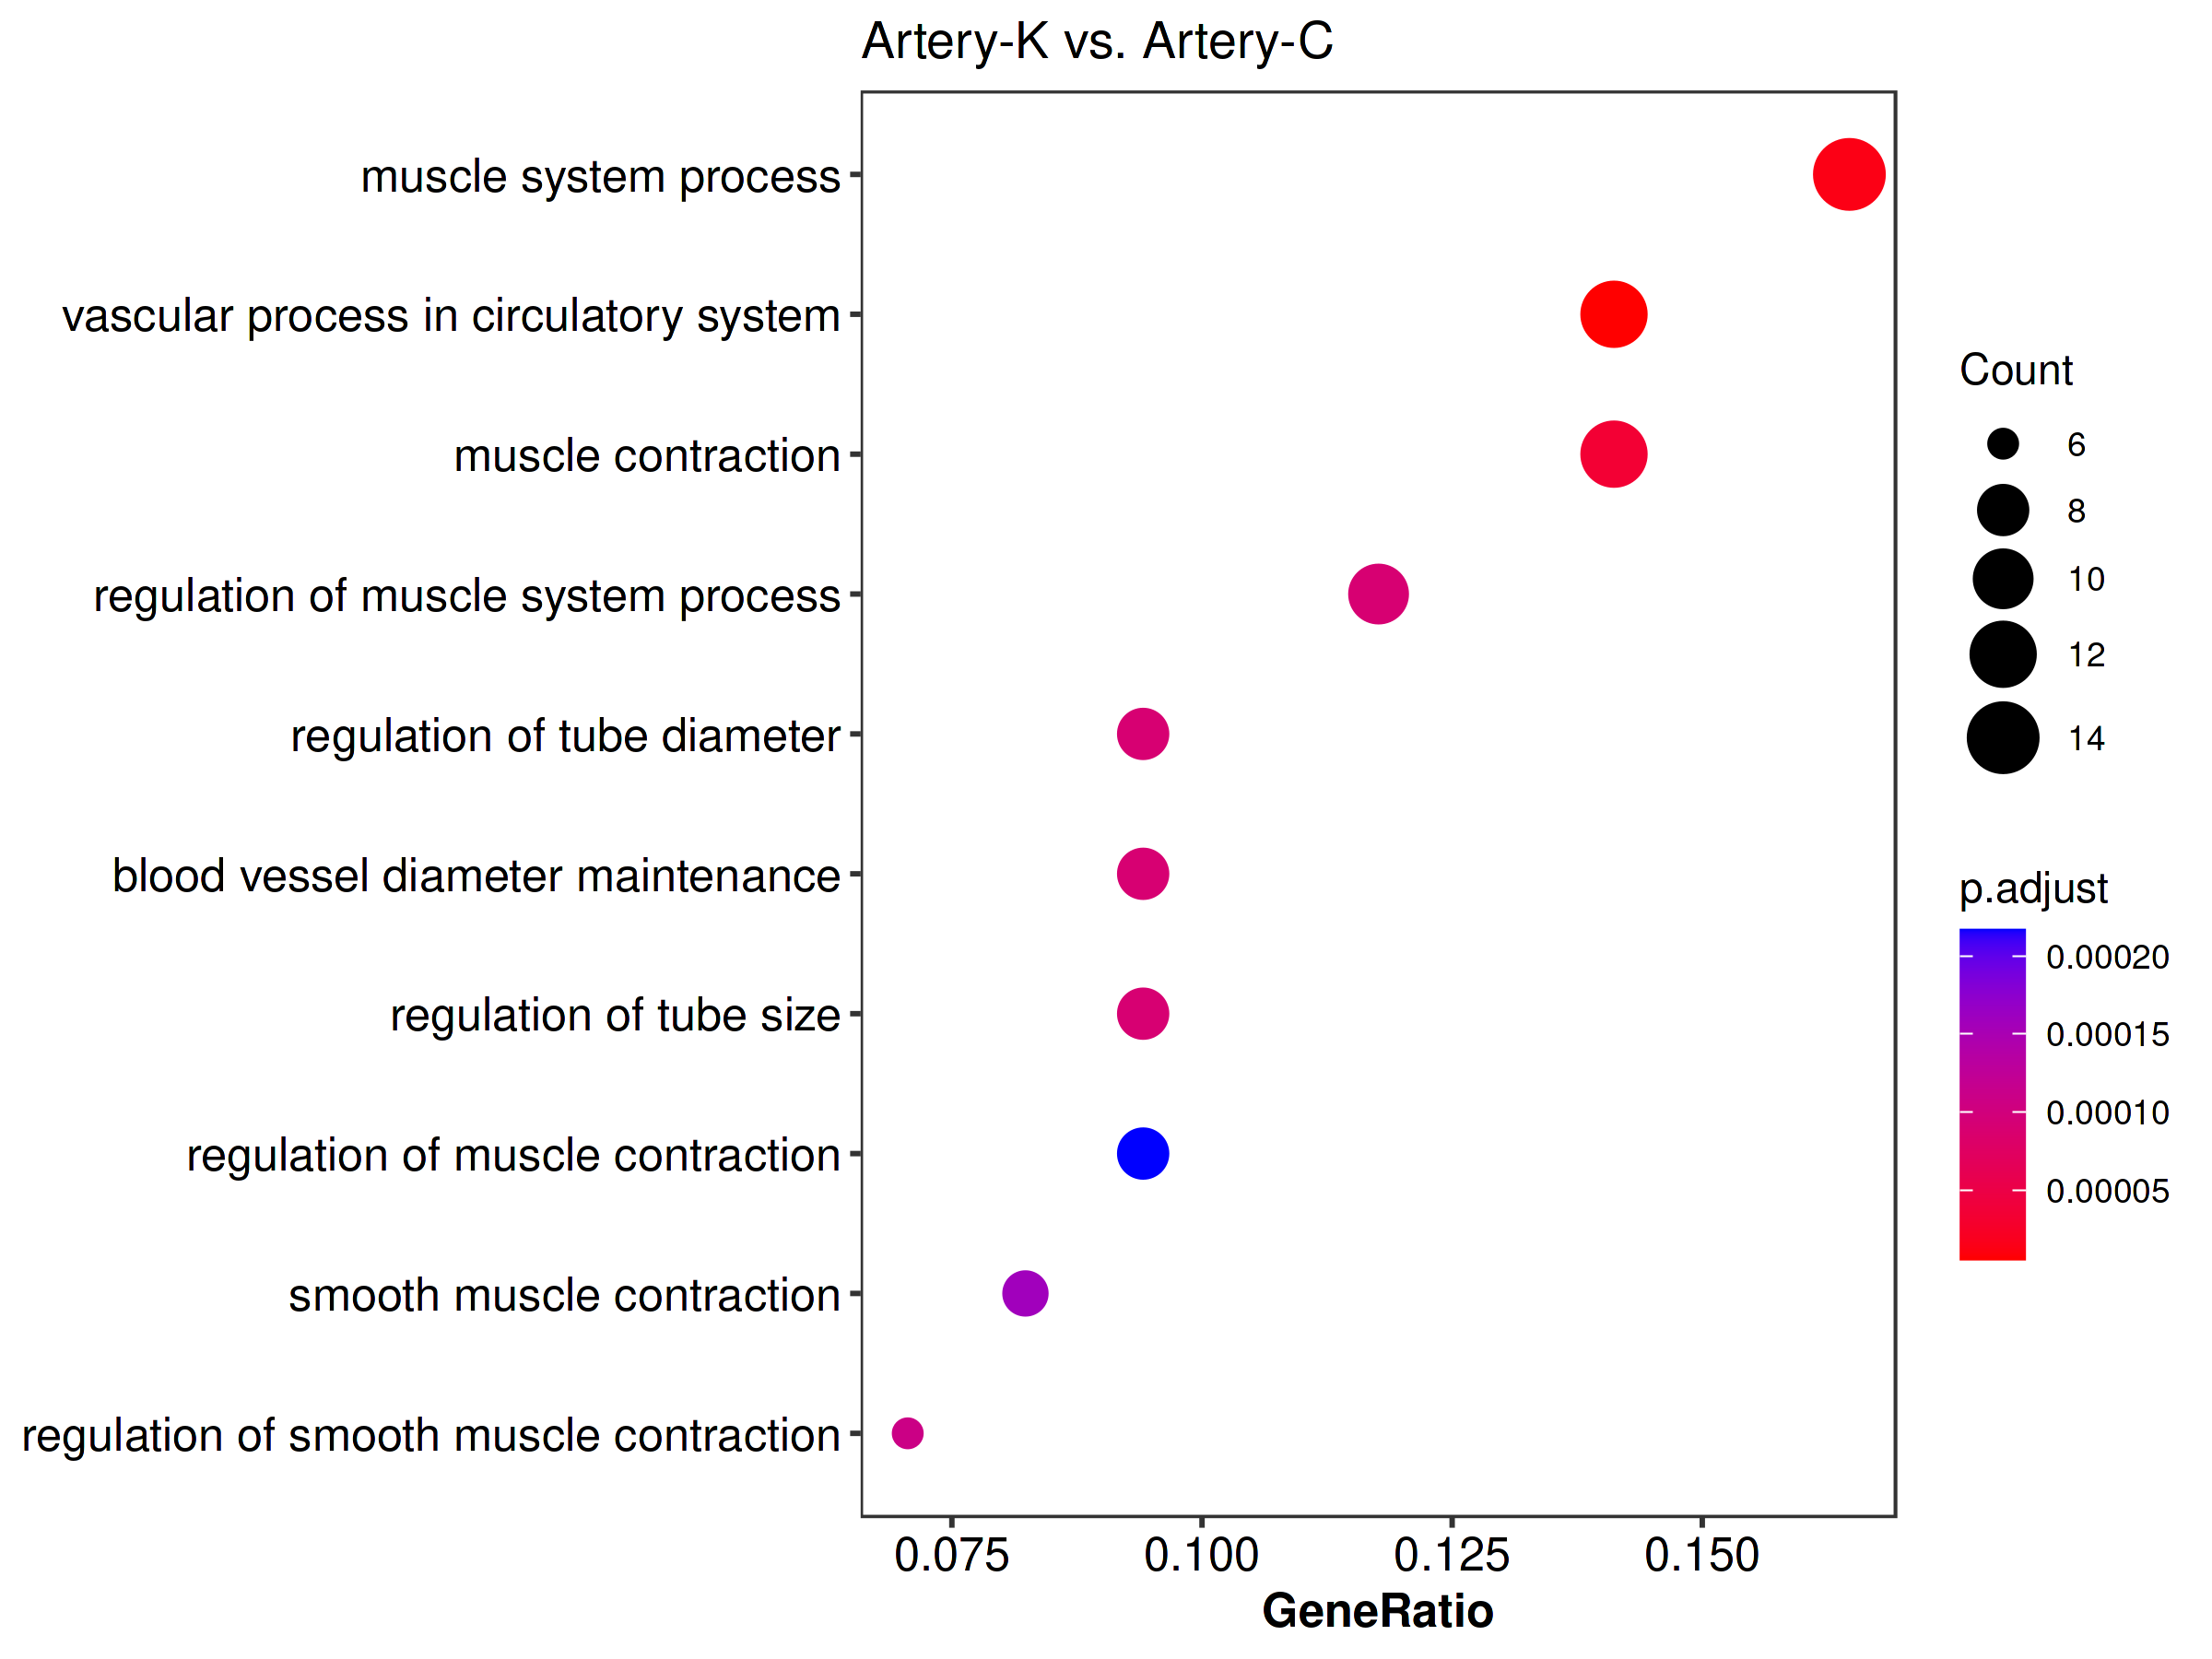

In [125]:
options(repr.plot.width = 8, repr.plot.height = 6, repr.plot.res = 300)
# Plot and visualise the data
p = dotplot(ego2)
# adjust the size of y axis labels

p = p + scale_y_discrete(labels = wrap_format(100))
p = p + custom_theme +
theme(axis.title.x = element_text(face="bold"), 
      panel.grid.major = element_blank(),
    panel.grid.minor = element_blank()
) + ggtitle("Artery-K vs. Artery-C")
p

ggsave(file.path(plots_path_supp, "ORA_DotPlot_arte_K_vs_C.png"), plot = p, width = 8, height = 6, units = "in", dpi = 300)
ggsave(file.path(plots_path_supp, "ORA_DotPlot_arte_K_vs_C.pdf"), plot = p, width = 8, height = 6, units = "in", dpi = 300)
ggsave(file.path(plots_path_supp, "ORA_DotPlot_arte_K_vs_C.svg"), plot = p, width = 8, height = 6, units = "in", dpi = 300)

#### Step4.5. Volcano Plot

In [111]:
deg2 = K.vs.C.markers

keyvals <- ifelse(
    deg2$avg_log2FC > 0 & deg2$p_val_adj < 0.05, as.character(color_palette["Artery-K"]),
      ifelse(deg2$avg_log2FC < 0 & deg2$p_val_adj < 0.05, as.character(color_palette["Artery-C"]),
        '#ADB6B6'))
  keyvals[is.na(keyvals)] <- '#ADB6B6'
  names(keyvals)[keyvals == as.character(color_palette["Artery-K"])] <- 'Artery-K'
  names(keyvals)[keyvals == as.character(color_palette["Artery-C"])] <- 'Artery-C'
  names(keyvals)[keyvals == '#ADB6B6'] <- 'p.adj>=0.05'

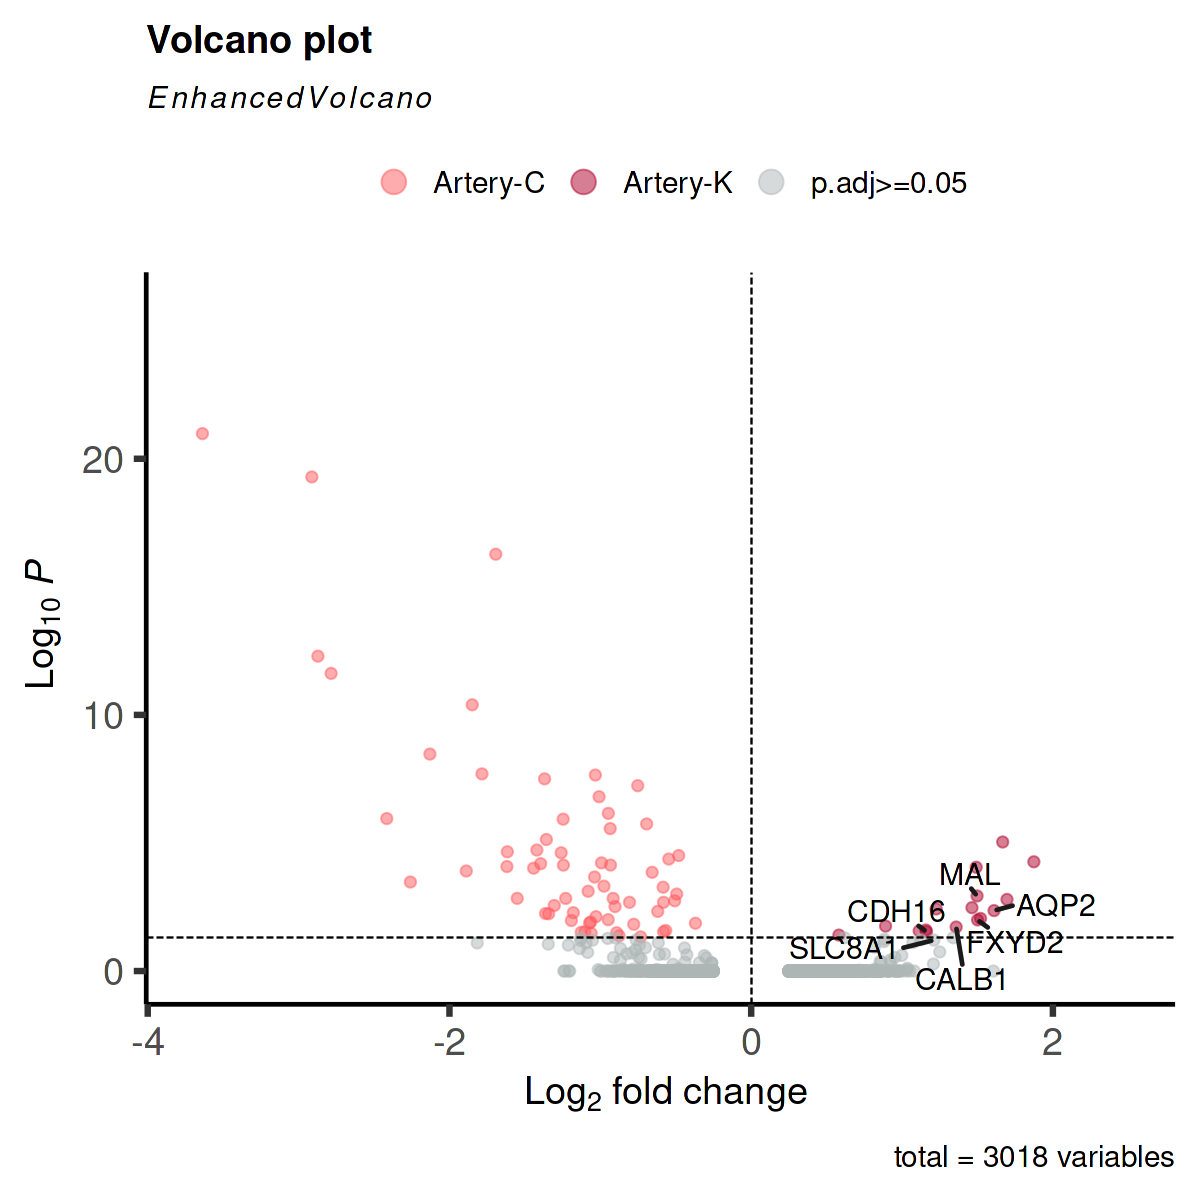

In [119]:
options(repr.plot.width = 8, repr.plot.height = 8, repr.plot.res = 150)

my_select = c('MAL', 'AQP2', 'CALB1', 'SLC8A1', 'FXYD2', 'CDH16')

p = EnhancedVolcano(deg2,
                    rownames(deg2),
                    selectLab = my_select,
                    drawConnectors = TRUE,
                    arrowheads = FALSE,
                    widthConnectors = 0.8,
                    x ="avg_log2FC",
                    y ="p_val_adj",
                    xlim = c(-3.7, 2.5),
                    pCutoff = 0.05,
                    FCcutoff = 0,      #  to not show the X axes,
                    gridlines.major = FALSE,
                    gridlines.minor = FALSE,
                    colCustom = keyvals
                   )
p = p + custom_theme
p

ggsave(file.path(plots_path_supp, "VolcanoPlot_FindMarkers_arte_K_vs_C.png"), plot = p, width = 8, height = 8, units = "in", dpi = 300)
ggsave(file.path(plots_path_supp, "VolcanoPlot_FindMarkers_arte_K_vs_C.pdf"), plot = p, width = 8, height = 8, units = "in", dpi = 300)
ggsave(file.path(plots_path_supp, "VolcanoPlot_FindMarkers_arte_K_vs_C.svg"), plot = p, width = 8, height = 8, units = "in", dpi = 300)

#### Step4.6. ORA analysis for Artery-C vs Artery-K

In [99]:
C.vs.K.markers = FindMarkers(dkd1_artery, ident.1 = "Artery-C", ident.2 = "Artery-K", min.pct = 0.1, return.thresh = 0.05)

In [110]:
deg_CK = C.vs.K.markers[C.vs.K.markers$pct.1 > 0.01 &
                    C.vs.K.markers$pct.2 > 0.01 &
                    C.vs.K.markers$avg_log2FC > 0.05 &
                    C.vs.K.markers$p_val < 0.05, ]
dim(deg_CK)

[1] 461   5

In [126]:
deg_CK_filter = deg_CK[rownames(deg_CK) %in% rownames(KC.markers), ]
dim(deg_CK_filter)

[1] 169   5

In [127]:
gene_list = rownames(deg_CK_filter)
ids <- bitr(gene_list, fromType = 'SYMBOL', toType = c('SYMBOL', 'ENTREZID'), OrgDb = 'org.Hs.eg.db')
ids = ids$ENTREZID
length(ids)

'select()' returned 1:1 mapping between keys and columns

Warning message in bitr(gene_list, fromType = "SYMBOL", toType = c("SYMBOL", "ENTREZID"), :
“0.59% of input gene IDs are fail to map...”


[1] 168

In [128]:
# Enrichment analysis with enrichGO Biological Process (BP)
ego2 <- enrichGO(gene         = ids,
                 OrgDb         = org.Hs.eg.db,
                 keyType       = 'ENTREZID',
                 ont           = "BP",
                 pAdjustMethod = "BH",
                 pvalueCutoff  = 0.01,
                 qvalueCutoff  = 0.05)

In [129]:
ego2

#
# over-representation test
#
#...@organism 	 Homo sapiens 
#...@ontology 	 BP 
#...@keytype 	 ENTREZID 
#...@gene 	 chr [1:168] "5320" "6423" "3240" "3479" "2619" "127435" "1116" "347" ...
#...pvalues adjusted by 'BH' with cutoff <0.01 
#...164 enriched terms found
'data.frame':	164 obs. of  9 variables:
 $ ID         : chr  "GO:0030198" "GO:0043062" "GO:0045229" "GO:0001667" ...
 $ Description: chr  "extracellular matrix organization" "extracellular structure organization" "external encapsulating structure organization" "ameboidal-type cell migration" ...
 $ GeneRatio  : chr  "24/164" "24/164" "24/164" "24/164" ...
 $ BgRatio    : chr  "318/18903" "319/18903" "321/18903" "492/18903" ...
 $ pvalue     : num  5.23e-16 5.62e-16 6.47e-16 7.23e-12 3.64e-11 ...
 $ p.adjust   : num  6.02e-13 6.02e-13 6.02e-13 5.04e-09 2.03e-08 ...
 $ qvalue     : num  4.58e-13 4.58e-13 4.58e-13 3.84e-09 1.55e-08 ...
 $ geneID     : chr  "6423/151887/2199/1281/4313/83716/2192/1278/10266/2331/1277/4015/1282/

Scale for y is already present.
Adding another scale for y, which will replace the existing scale.


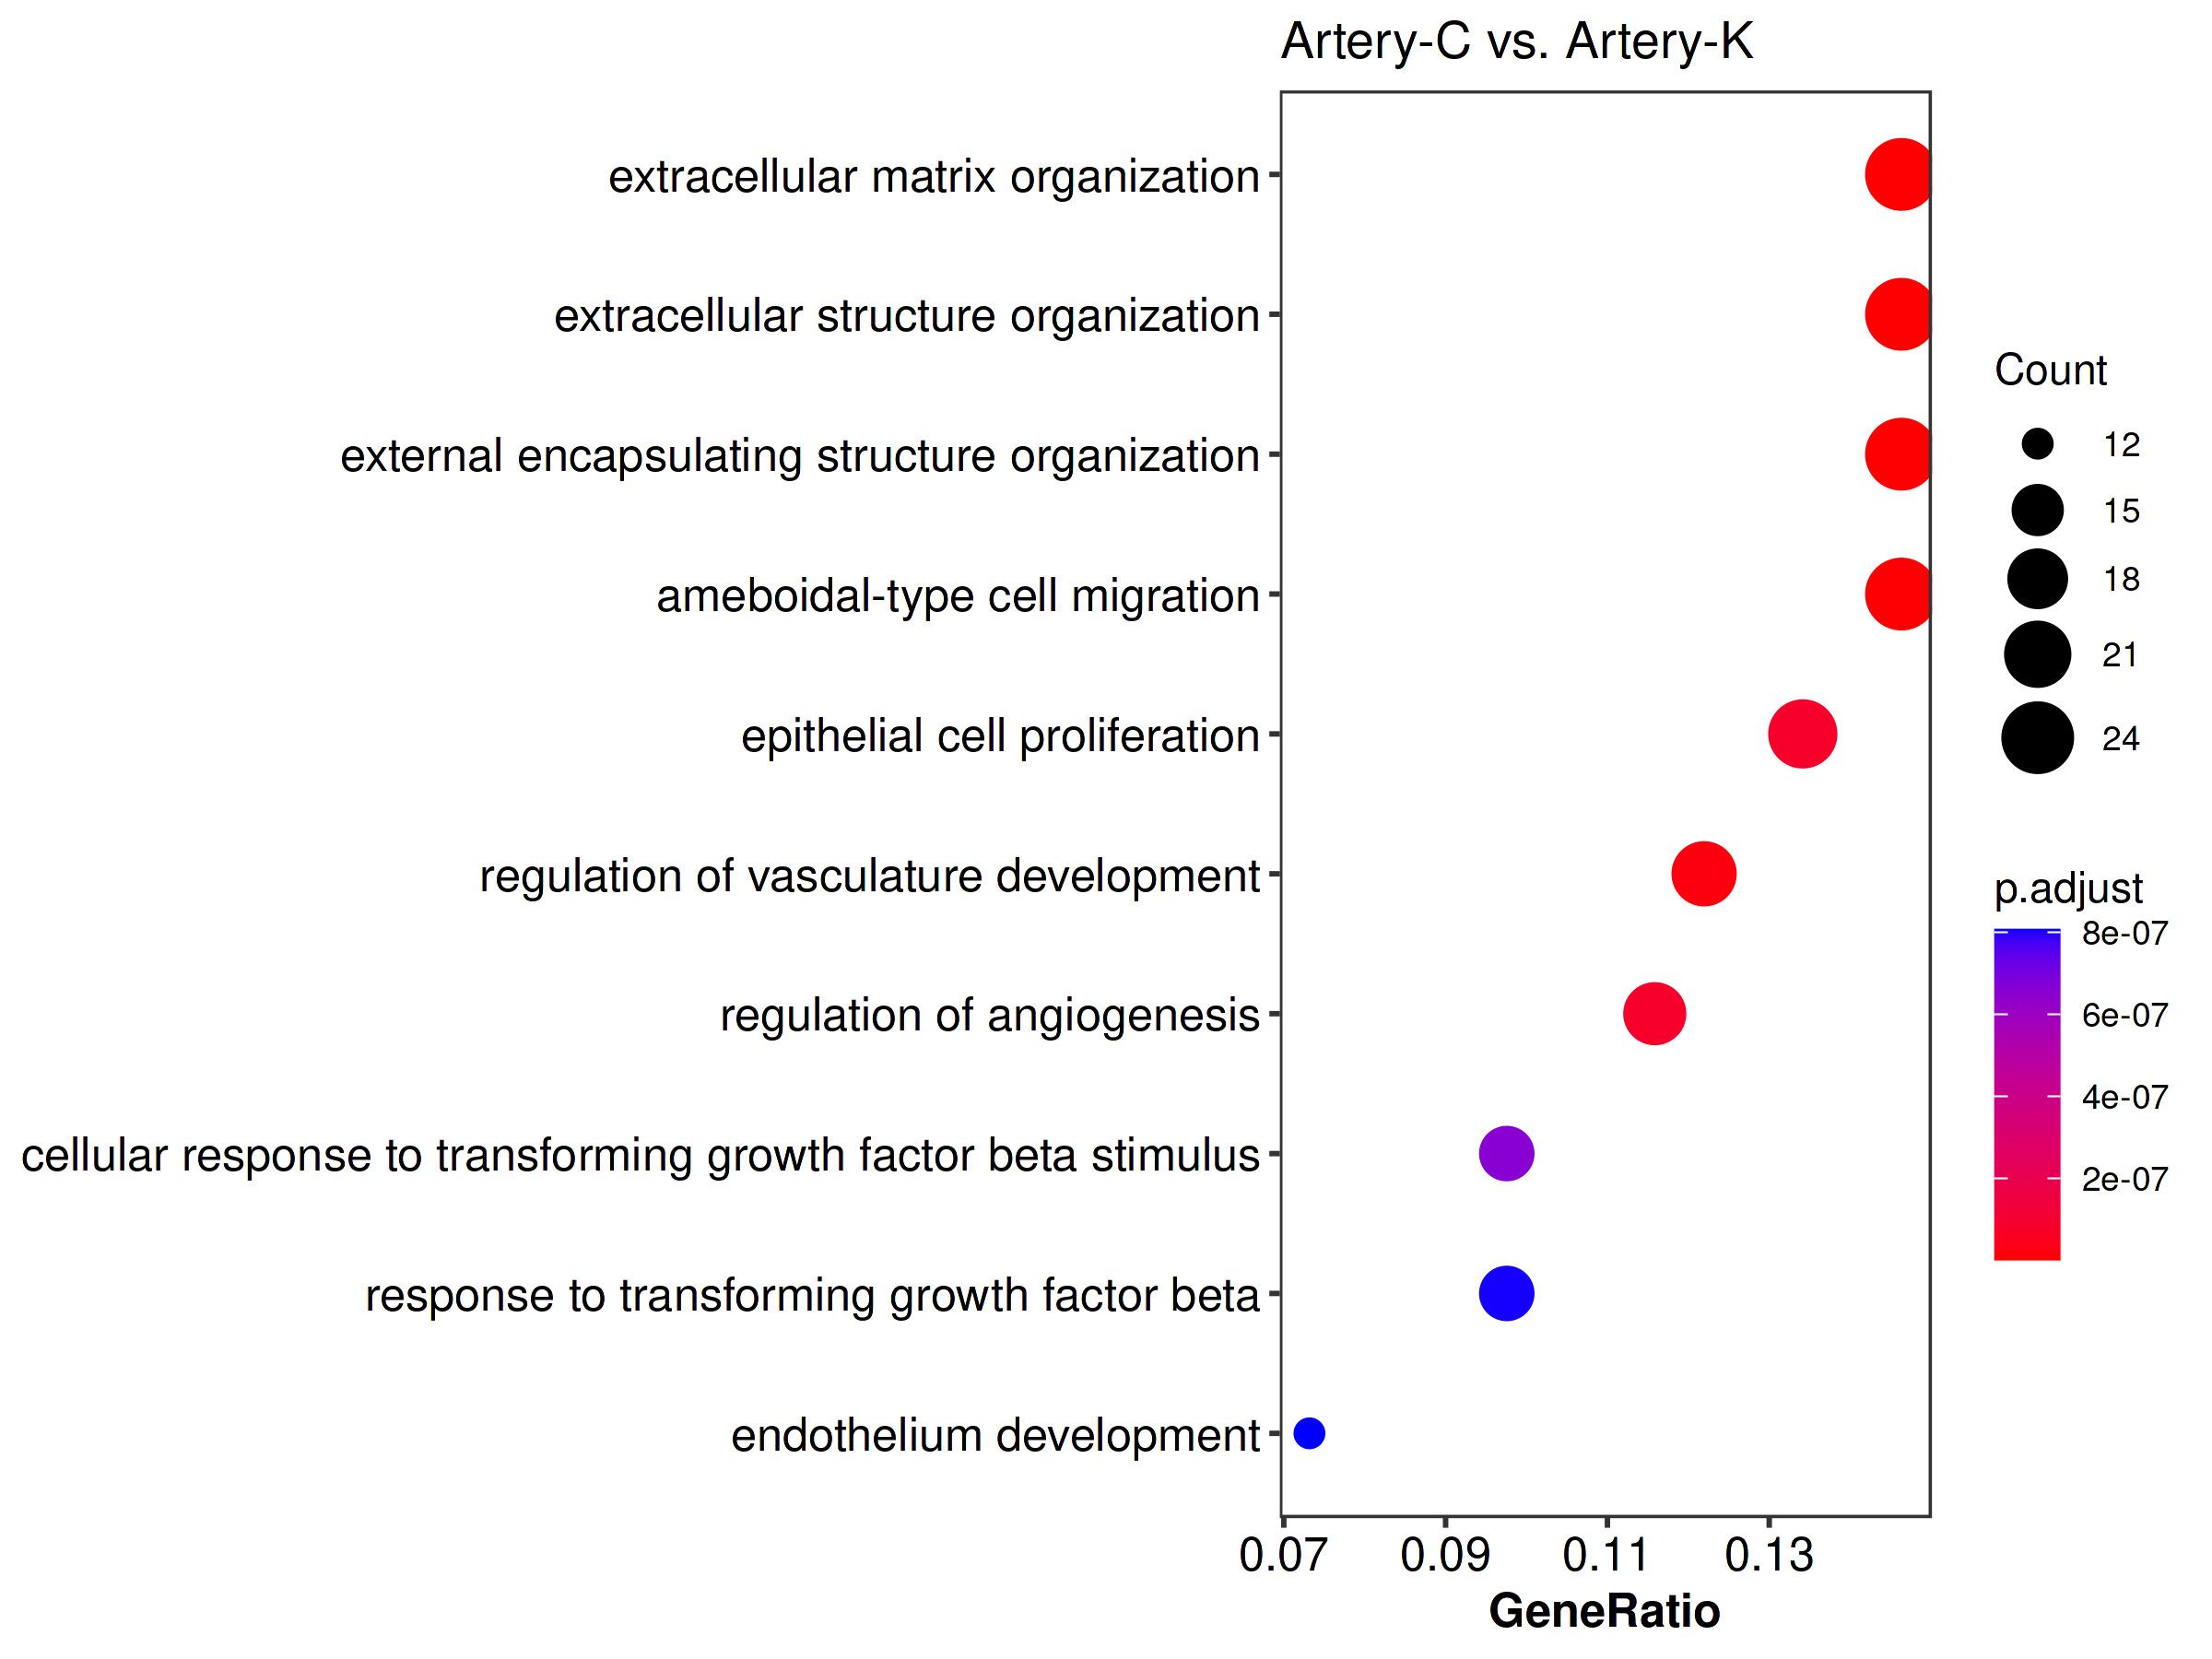

In [131]:
options(repr.plot.width = 8, repr.plot.height = 6, repr.plot.res = 300)
# Plot and visualise the data
p = dotplot(ego2)
# adjust the size of y axis labels

p = p + scale_y_discrete(labels = wrap_format(100))
p = p + custom_theme +
theme(axis.title.x = element_text(face="bold"), 
      panel.grid.major = element_blank(),
    panel.grid.minor = element_blank()
) + ggtitle("Artery-C vs. Artery-K")
p

ggsave(file.path(plots_path_supp, "ORA_DotPlot_arte_C_vs_K.png"), plot = p, width = 8, height = 6, units = "in", dpi = 300)
ggsave(file.path(plots_path_supp, "ORA_DotPlot_arte_C_vs_K.pdf"), plot = p, width = 8, height = 6, units = "in", dpi = 300)
ggsave(file.path(plots_path_supp, "ORA_DotPlot_arte_C_vs_K.svg"), plot = p, width = 8, height = 6, units = "in", dpi = 300)


### Create violin plot to test nCount_spatial and nFeature_spatial has variance for Artery spots

In [5]:
df_meta = dkd1@meta.data
head(df_meta)

,orig.ident,nCount_Spatial,nFeature_Spatial,Barcode,Morph.based,percent.mt,nCount_SCT,nFeature_SCT,SCT_snn_res.0.8,seurat_clusters
,<fct>,<dbl>,<int>,<chr>,<fct>,<dbl>,<dbl>,<int>,<fct>,<fct>
AACACTTGGCAAGGAA-1,SeuratProject,37726,9197,AACACTTGGCAAGGAA-1,Tumor,2.534061,16669,6999,7,7
AACAGGATTCATAGTT-1,SeuratProject,15426,6541,AACAGGATTCATAGTT-1,Glomeruli,1.277065,15430,6541,3,3
AACAGGTTATTGCACC-1,SeuratProject,19244,7267,AACAGGTTATTGCACC-1,PT,3.138641,16972,7266,0,0
AACAGGTTCACCGAAG-1,SeuratProject,24380,8180,AACAGGTTCACCGAAG-1,LH-CD,2.038556,16653,7770,11,11
AACAGTCAGGCTCCGC-1,SeuratProject,22432,8043,AACAGTCAGGCTCCGC-1,Other,2.166548,16784,7878,11,11
AACATCTTAAGGCTCA-1,SeuratProject,18935,7598,AACATCTTAAGGCTCA-1,Other,4.182730,17050,7597,1,1


In [6]:
custom_theme <- theme(text = element_text(family = "Helvetica"))

empty_theme = theme(panel.grid.major = element_blank(),
                    panel.grid.minor = element_blank(),
#                     panel.background = element_blank(),  # Remove panel background
                    axis.line.x = element_line(),          
                    axis.ticks = element_line(),
                    axis.text.x = element_text(angle = 45, hjust = 1))         

In [7]:
Idents(dkd1) = "Morph.based"

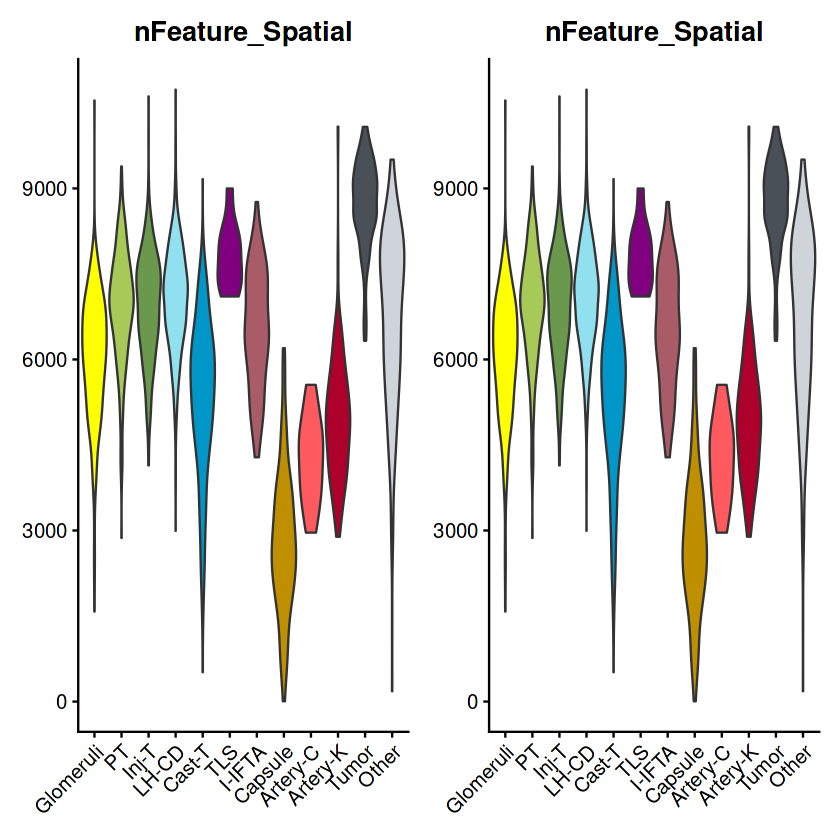

In [9]:
p1 = VlnPlot(object = dkd1, features = c("nCount_Spatial"), pt.size = 0, cols = color_palette) + 
theme(axis.title.x=element_blank(),
      axis.title.y=element_blank(),
     legend.position = "none" ) + 
    custom_theme

p2 = VlnPlot(object = dkd1, features = c("nFeature_Spatial"), pt.size = 0, cols = color_palette) + 
theme(axis.title.x=element_blank(),
      axis.title.y=element_blank(),
     legend.position = "none" ) + 
    custom_theme

p = p1 | p2
p

ggsave(p, filename = file.path(plots_path_supp, "VlnPlot_nCount_nFeature.png"), width = 10, height = 4, units = "in", dpi = 300)
ggsave(p, filename = file.path(plots_path_supp, "VlnPlot_nCount_nFeature.pdf"), width = 10, height = 4, units = "in", dpi = 300)
